In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.dates import DateFormatter

from load_wastewater_data import load_systems_data

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [10]:
plot_path = f"../plots/wastewater_model/viral_decay"
os.makedirs(os.path.join(plot_path), exist_ok=True)
# file_name_prefix = f"{substance}_{rain_scenario}_{degradation_setting}"

### Visualization of different viral decay models

##### Viral decay models w.r.t. different IC

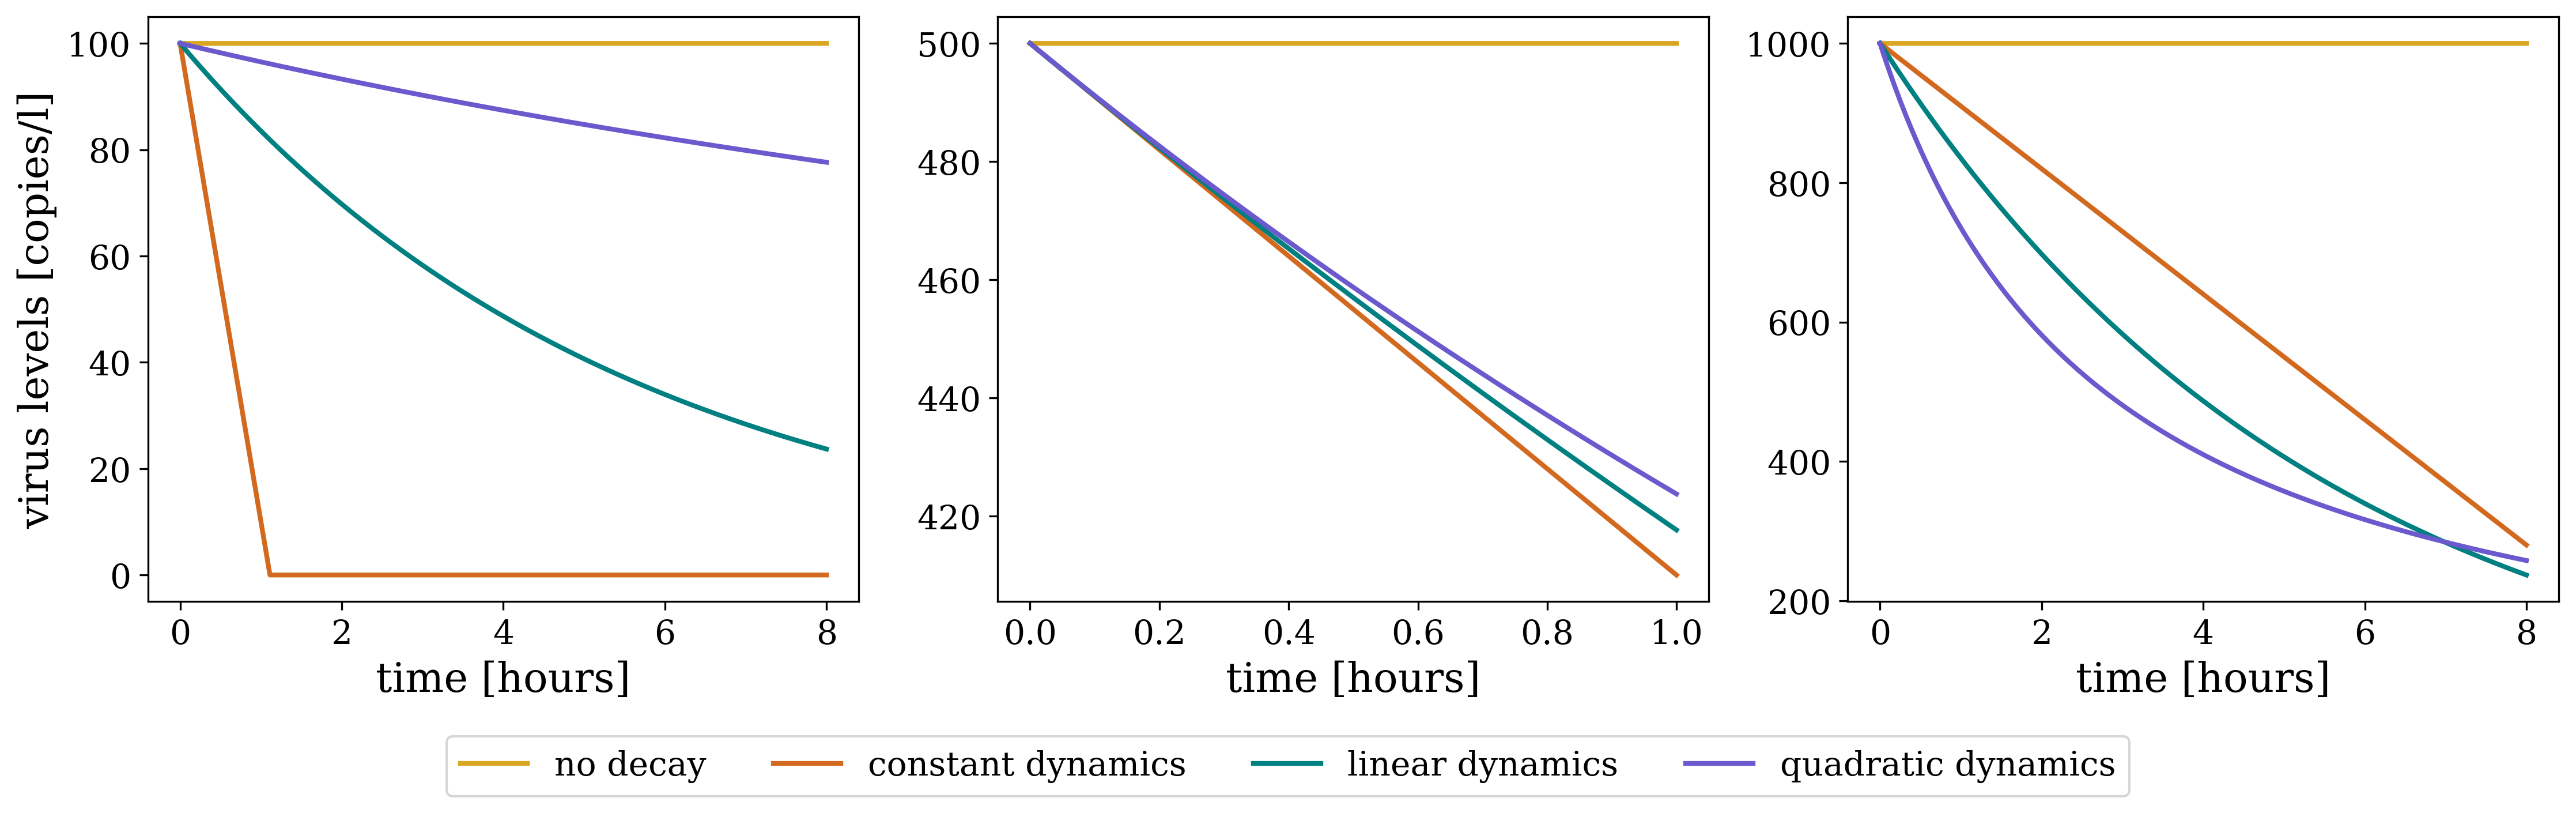

In [14]:
c = ["goldenrod", "chocolate", "teal", "slateblue"]
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300, sharey=False, sharex=False)

start_values = [100, 500, 1000]
hours = [8, 1, 8]

for i, ax in enumerate(axs):
    start_value = start_values[i]
    hour = hours[i]
    t_max = hour * 60 * 60
    t_vals = np.arange(0, t_max, 1)
    no_decay = [start_value for t in t_vals]
    constant_decay = [start_value - 2.5 * 10**(-2) * t for t in t_vals]
    constant_decay = [max(0, c) for c in constant_decay]
    linear_decay = [start_value * np.exp(-5 * 10**(-5) * t) for t in t_vals]
    quadratic_decay = [1 / (10**(-7) * t + 1 / start_value) for t in t_vals]

    t_vals = [t / 60 / 60 for t in t_vals]
    ax.plot(t_vals, no_decay, label='no decay', color=c[0], linewidth=2)
    ax.plot(t_vals, constant_decay, label='constant dynamics', color=c[1], linewidth=2)
    ax.plot(t_vals, linear_decay, label='linear dynamics', color=c[2], linewidth=2)
    ax.plot(t_vals, quadratic_decay, label='quadratic dynamics', color=c[3], linewidth=2)
    ax.set_xlabel('time [hours]', fontsize=17)
    if i==0:
        ax.set_ylabel('virus levels [copies/l]', fontsize=17)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Create a single legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=14)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust layout to make room for the legend
# plt.show()
plt.savefig(os.path.join(plot_path, 'overview_decay_dynamics_per_IC.png'))


#### Viral decay models w.r.t. different parameters

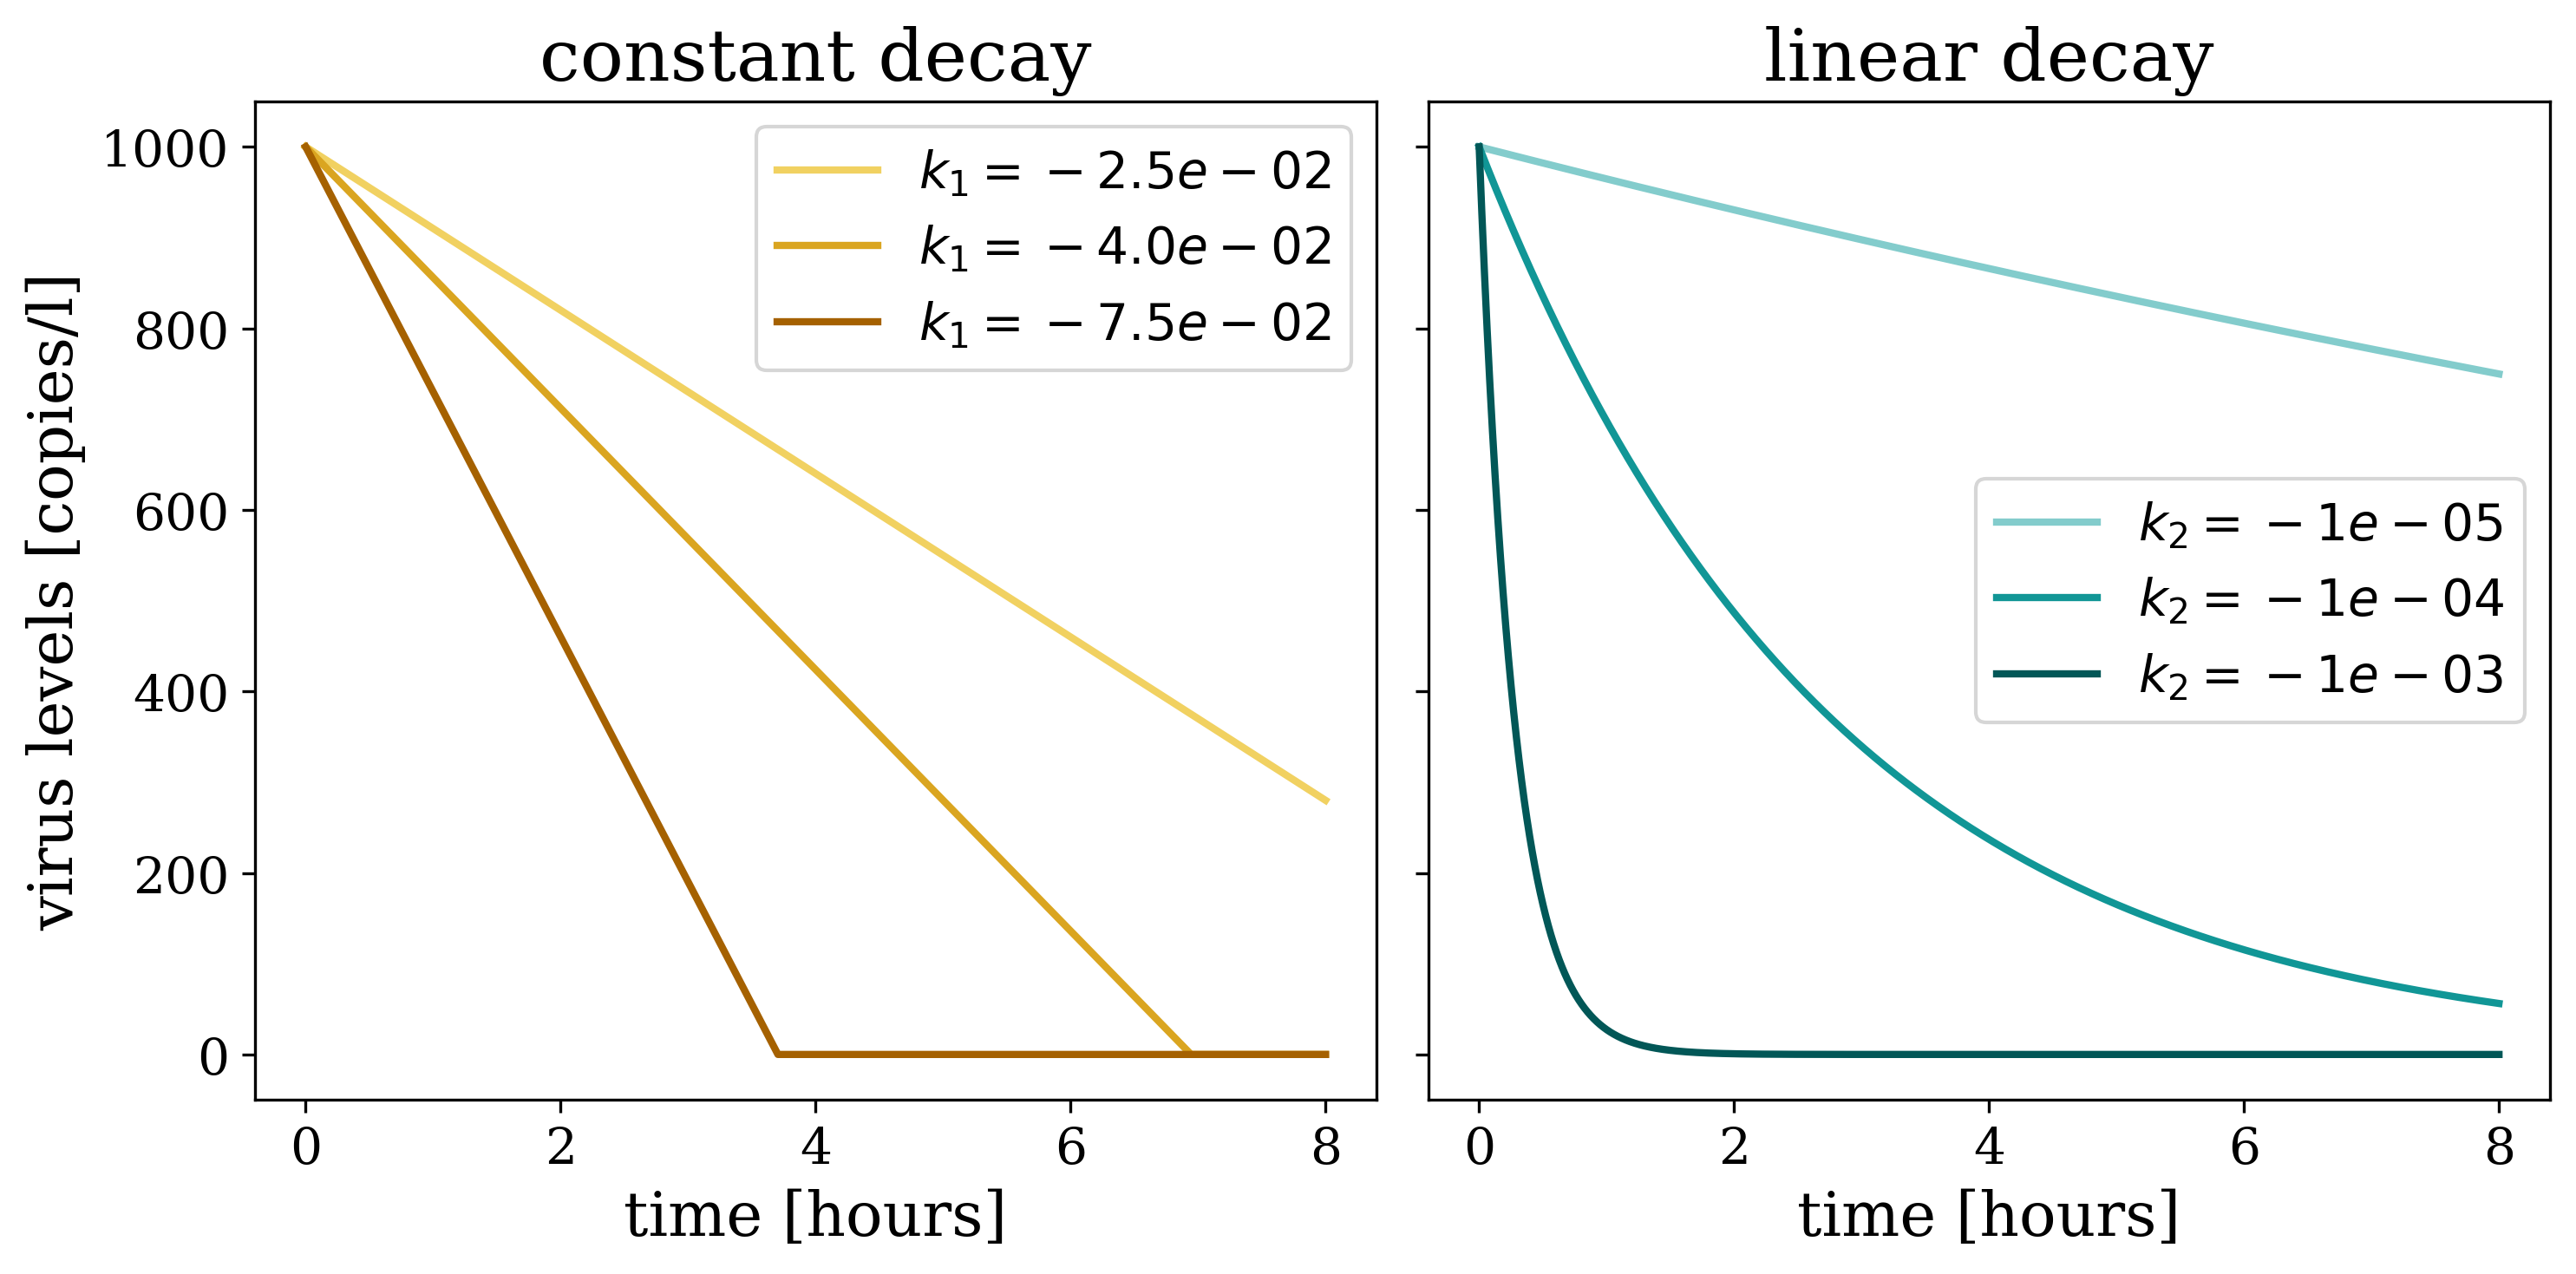

In [23]:
c = ["goldenrod", "chocolate", "teal", "slateblue"]

c = [["#f1d161", "goldenrod", "#a56100"], ["#83cccc", "#119696", "#025757"]] # , ["#8a491b", "chocolate", "#fabc8f", "slateblue"], ["goldenrod", "chocolate", "teal", "slateblue"]]

fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300, sharey=True, sharex=True)

start_value = 1000
t_vals = np.arange(0, t_max, 1)

constant_pars = [2.5*10**(-2), 4*10**(-2), 7.5*10**(-2)]
constant_decays = [[max(0, start_value - par*t) for t in t_vals] for par in constant_pars]
linear_pars = [-10**(-5), -10**(-4),  -10**(-3)]
linear_decays = [[start_value * np.exp(par * t) for t in t_vals] for par in linear_pars]

quadratic_pars = [10**(-5), 10**(-6), 10**(-7)]
quadratic_decays = [[1 / (par * t + 1 / start_value) for t in t_vals] for par in quadratic_pars]

t_vals = [t/60/60 for t in t_vals]

# constant decay
for i, decay in enumerate(constant_decays):
    axs[0].plot(t_vals, decay, label=f'$k_1 = {-constant_pars[i]:.1e}$', color=c[0][i], linewidth=2)
    axs[0].legend(fontsize=14)
    axs[0].set_title('constant decay', fontsize=20)

# linear decay
for i, decay in enumerate(linear_decays):
    axs[1].plot(t_vals, decay, label=f'$k_2 = {linear_pars[i]:.0e}$', color=c[1][i], linewidth=2)
    axs[1].legend(fontsize=14)
    axs[1].set_title('linear decay', fontsize=20)

"""
# quadratic
for i, decay in enumerate(quadratic_decays):
    axs[2].plot(t_vals,decay, label=f'$k_3 = {-quadratic_pars[i]:.0e}$', color=c[2][i], linewidth=2)
    axs[2].legend(fontsize=14)
    axs[2].set_title('quadratic decay', fontsize=20)
""" 

axs[0].set_ylabel('virus levels [copies/l]', fontsize=17)

for i, ax in enumerate(axs):
    ax.set_xlabel('time [hours]', fontsize=17)
    ax.tick_params(axis='x', labelsize=14)
    if i==0:
        ax.tick_params(axis='y', labelsize=14)



plt.tight_layout() 
# plt.show()
plt.savefig(os.path.join(plot_path, 'overview_decay_dynamics_per_parameter.png'))


# Plots based on simulation results

In [24]:
# define experiment to be preprocessed
experiment_series = "2024_04_03"

substance = "COVID" # one of PMMoV, COVID
rain_scenario = "KeinRegen" # one of KeinRegen, Nieselregen, MittelstarkerRegen

In [25]:
# no_decay", "linear_decay_dynamics", "constant_decay_dynamics"
df_no_decay = load_systems_data(experiment_series, substance, rain_scenario, "no_decay", file_type="concentrations")
df_linear_decay = load_systems_data(experiment_series, substance, rain_scenario, "linear_decay_dynamics", file_type="concentrations")
df_constant_decay = load_systems_data(experiment_series, substance, rain_scenario, "constant_decay_dynamics", file_type="concentrations")

In [26]:
# old plot version
"""
date_form = DateFormatter("%-d")

station = "17"

fig, axs = plt.subplots(ncols=4, sharey=False, figsize=(18, 4), dpi=300)
for i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay, df_quadratic_decay], ["no decay", "constant substance dynamics", "linear substance dynamics", "quadratic substance dynamics"])):
    sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[i], color=["goldenrod", "chocolate", "teal", "slateblue"][i])
    axs[i].set_title(f"{variate_title}")    
    axs[i].xaxis.set_major_formatter(date_form) 
    axs[i].set_xlabel(f"simulation time (days)")
    if i != 0:
        axs[i].set_ylabel("")
    axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])

axs[0].set_ylabel(f"copies/l for {station}")
fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", f"next_to_each_other_{rain_scenario}_{station}.png"))
"""

'\ndate_form = DateFormatter("%-d")\n\nstation = "17"\n\nfig, axs = plt.subplots(ncols=4, sharey=False, figsize=(18, 4), dpi=300)\nfor i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay, df_quadratic_decay], ["no decay", "constant substance dynamics", "linear substance dynamics", "quadratic substance dynamics"])):\n    sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[i], color=["goldenrod", "chocolate", "teal", "slateblue"][i])\n    axs[i].set_title(f"{variate_title}")    \n    axs[i].xaxis.set_major_formatter(date_form) \n    axs[i].set_xlabel(f"simulation time (days)")\n    if i != 0:\n        axs[i].set_ylabel("")\n    axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])\n\naxs[0].set_ylabel(f"copies/l for {station}")\nfig.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", f"next_to_each_other_{rain_scenario}_{station}.png"))\n'

#### Visualize simulation results for 1 station

/tmp/ipykernel_236043/715951961.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/715951961.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/715951961.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


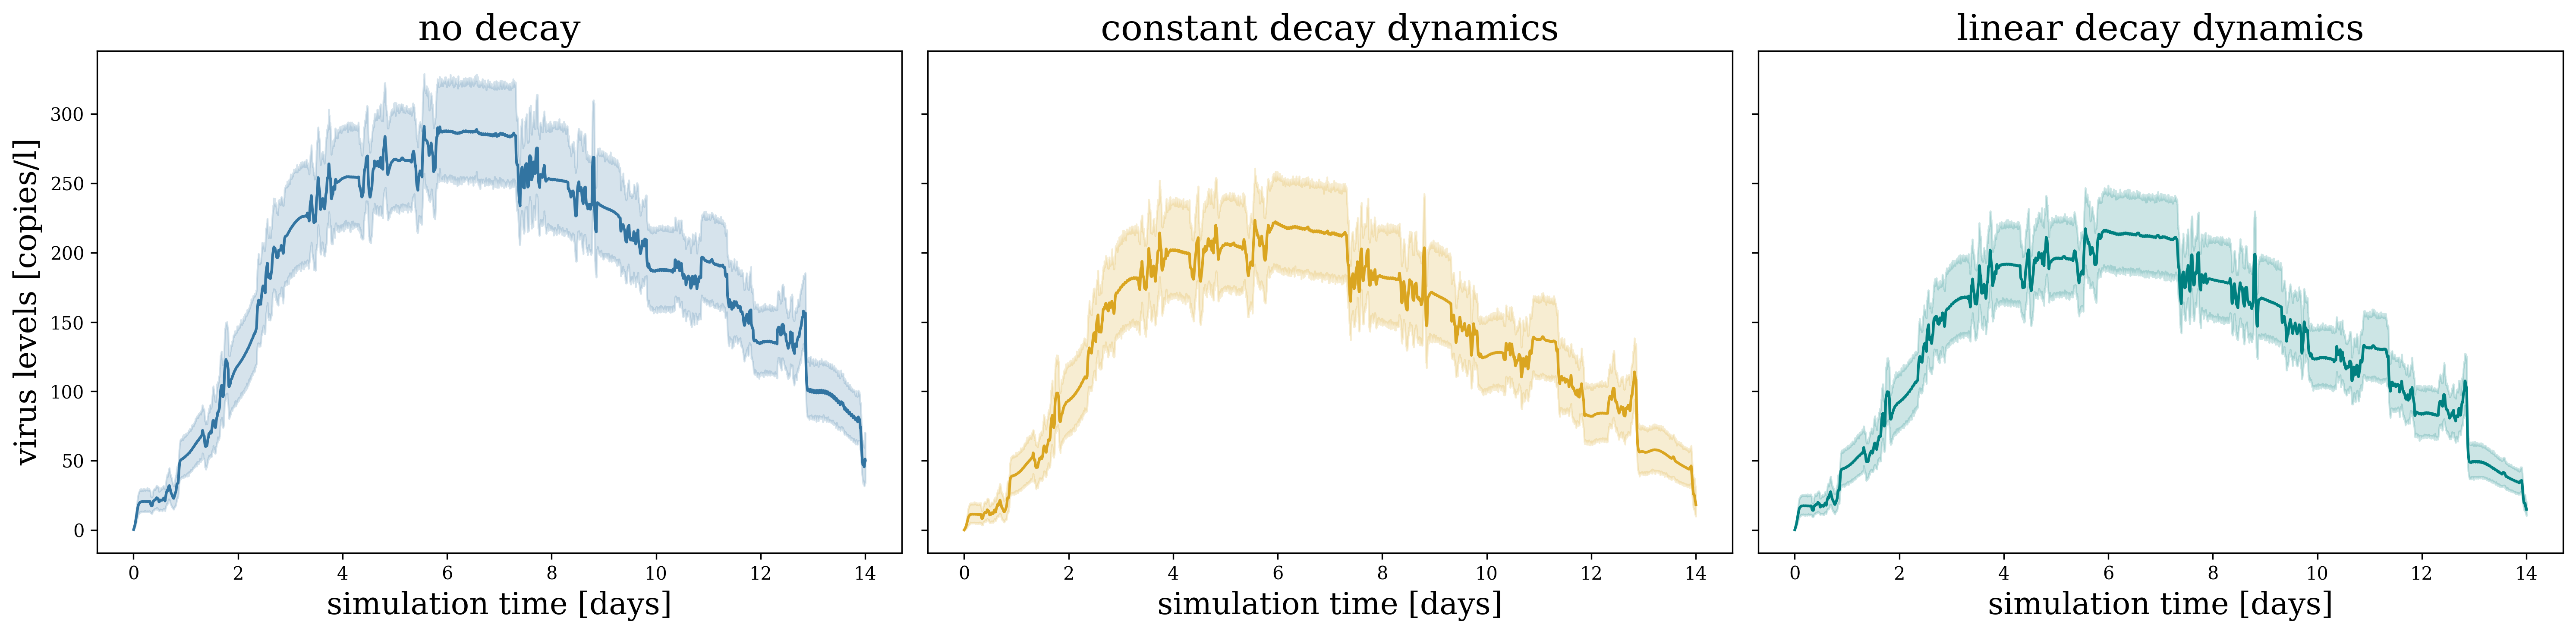

In [44]:
date_form = DateFormatter("%-d")

stations = ["16"]

fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 5), dpi=300)
for j, station in enumerate(stations):
    for i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay], ["no decay", "constant decay dynamics", "linear decay dynamics"])):
        sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[i], color=["#3274A1", "goldenrod", "teal"][i])
        if j==0:
            axs[i].set_title(f"{variate_title}", fontsize=20)
        axs[i].xaxis.set_major_formatter(date_form) 
        
        if i != 0:
            axs[i].set_ylabel("")
        axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])

        if j==0:
            axs[i].set_xlabel(f"simulation time [days]", fontsize=17)
        else:
            axs[i].set_xlabel("")

    axs[0].set_ylabel(f"virus levels [copies/l]", fontsize=17)

plt.tight_layout()
fig.savefig(os.path.join(plot_path, f"next_to_each_other_{substance}_{rain_scenario}_{stations[0]}.png"))

#### Visualize simulation results for several stations

/tmp/ipykernel_236043/3101368847.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/3101368847.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/3101368847.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/3101368847.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/3101368847.py:16: 

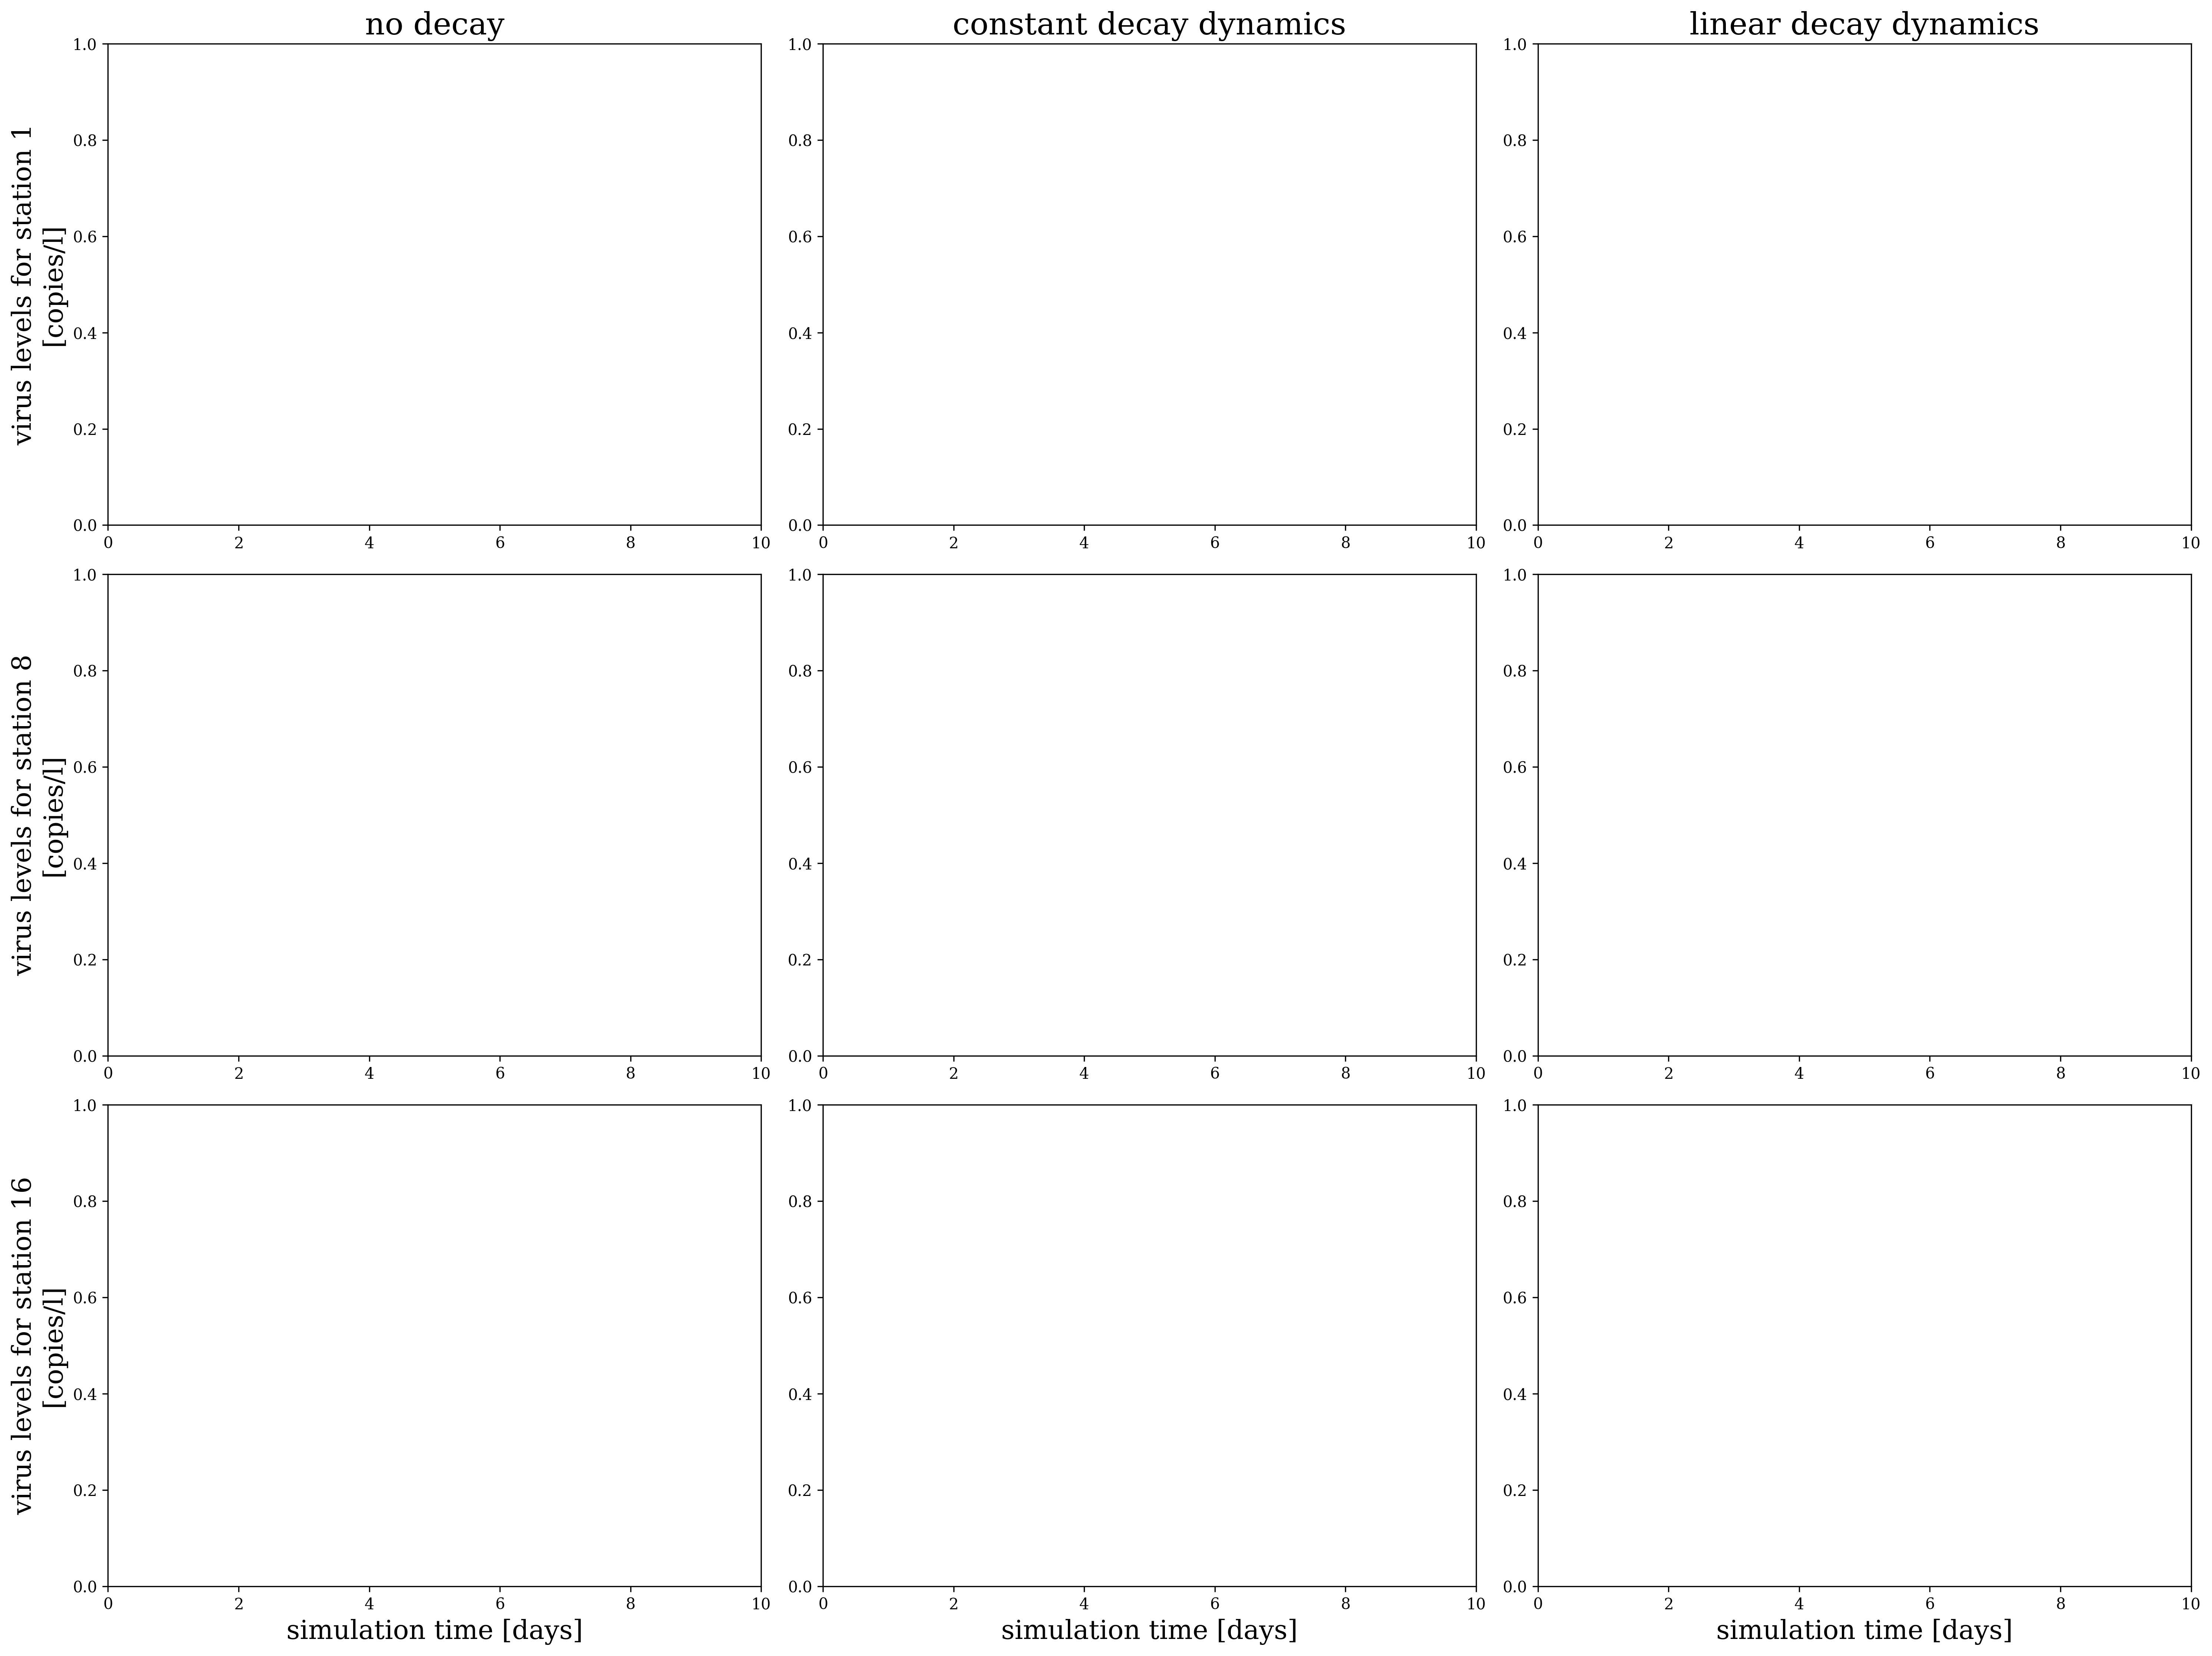

In [35]:
date_form = DateFormatter("%-d")

stations = ["1", "8", "16"]
# stations = ["1", "8", "16"]

fig, axs = plt.subplots(nrows=3, ncols=3, sharey=False, figsize=(20, 15), dpi=300)
for j, station in enumerate(stations):
    for i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay], ["no decay", "constant decay dynamics", "linear decay dynamics"])):
        sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[j,i], color=["#3274A1", "goldenrod", "teal"][i])
        if j==0:
            axs[j,i].set_title(f"{variate_title}", fontsize=20)
        axs[j,i].xaxis.set_major_formatter(date_form) 
        
        if i != 0:
            axs[j,i].set_ylabel("")
        axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])

        if j==2:
            axs[j,i].set_xlabel(f"simulation time [days]", fontsize=17)
        else:
            axs[j,i].set_xlabel("")

    axs[j,0].set_ylabel(f"virus levels for station {station}\n[copies/l]", fontsize=17)

plt.tight_layout()
fig.savefig(os.path.join(plot_path, f"next_to_each_other_{substance}_{rain_scenario}_{stations[0]}_{stations[1]}_{stations[2]}.png"))

/tmp/ipykernel_236043/4010219618.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/4010219618.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/4010219618.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/4010219618.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_236043/4010219618.py:19: 

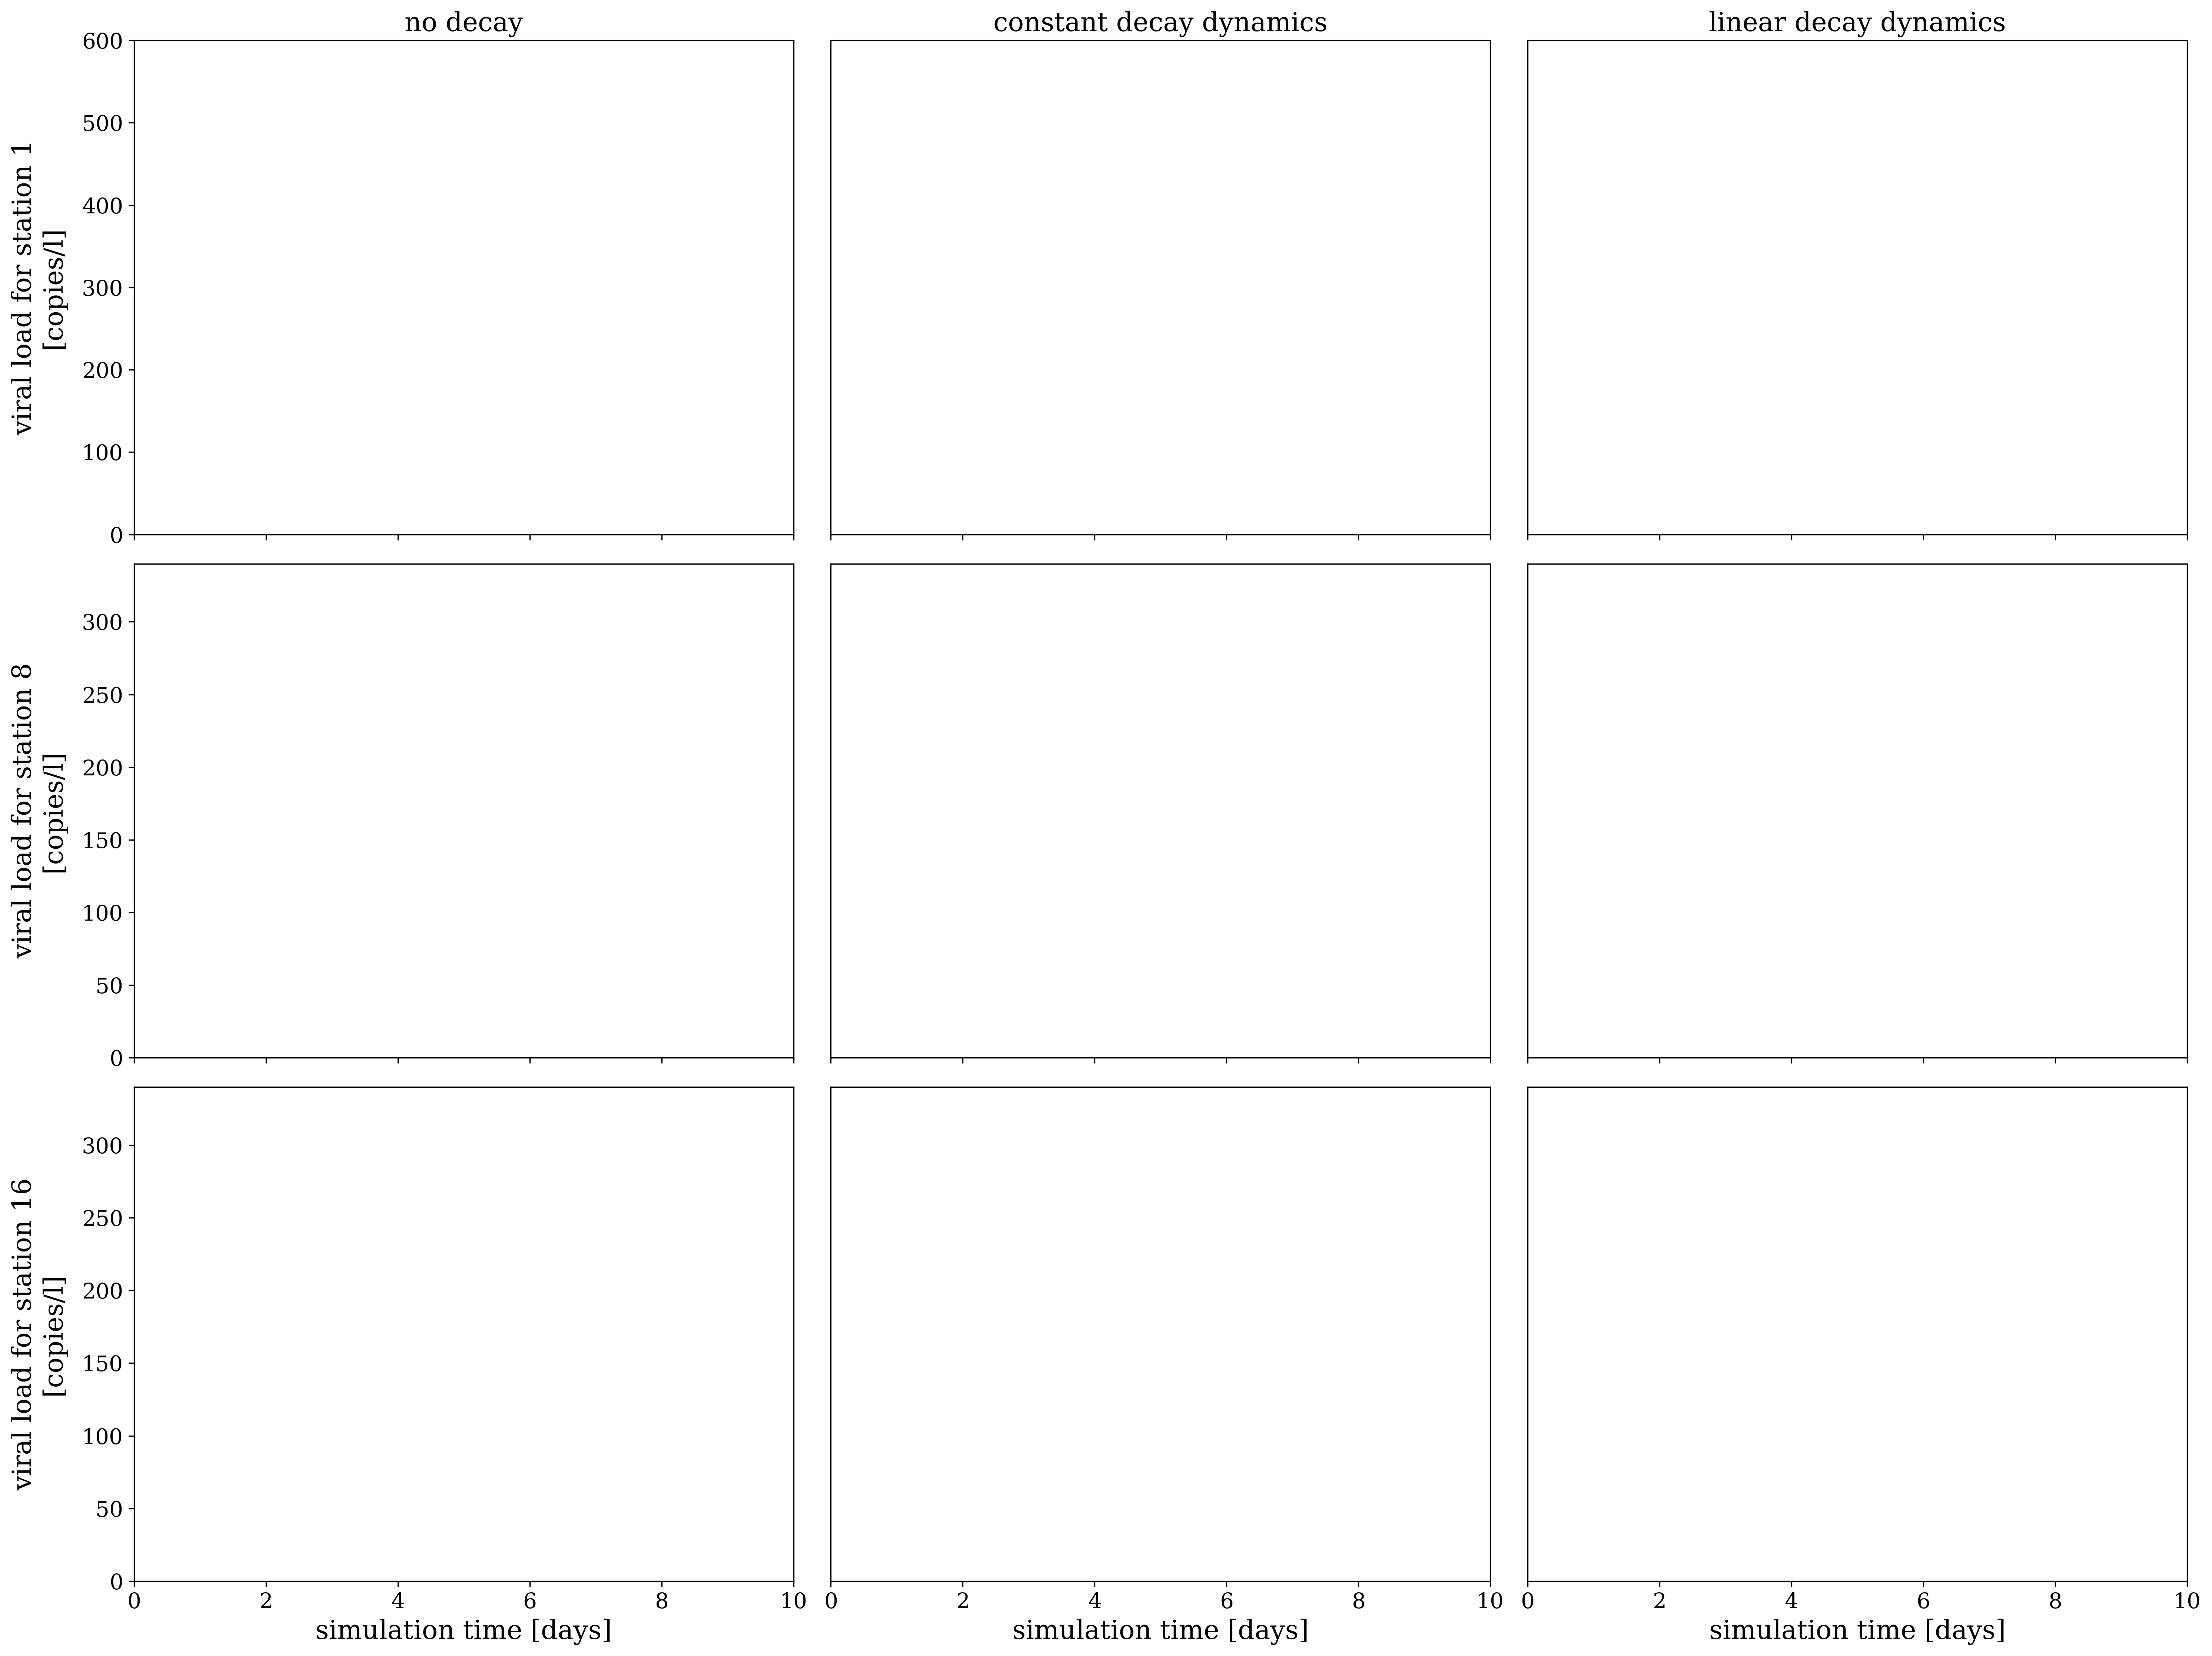

In [43]:
date_form = DateFormatter("%-d")

stations = ["1", "8", "16"]

# Define y-axis limits for each row to ensure that y values are shared
y_limits = [(0, 600), (0, 340), (0, 340)]  # for stations 1, 8, 17


fig, axs = plt.subplots(nrows=3, ncols=3, sharey=False, sharex=True, figsize=(20, 15), dpi=300)
for j, station in enumerate(stations):
    for i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay],  ["no decay", "constant decay dynamics", "linear decay dynamics"])):
        sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[j,i], color=["#3274A1", "goldenrod", "teal"][i])
        if j==0:
            axs[j,i].set_title(f"{variate_title}", fontsize=17)    
        axs[j,i].xaxis.set_major_formatter(date_form) 
        
        if i != 0:
            axs[j,i].set_ylabel("")
        axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])

        if j==2:
            axs[j,i].set_xlabel(f"simulation time [days]", fontsize=17)
        else:
            axs[j,i].set_xlabel("")

    axs[j,0].set_ylabel(f"viral load for station {station}\n[copies/l]", fontsize=17, labelpad=10)
    axs[j, 0].set_ylim(y_limits[j])  # Set y-axis limit for the first column of each row
    for k in range(1, 3):
        axs[j, k].set_ylim(y_limits[j]) 

for i in range(3):
    for j in range(3):
        axs[j,i].tick_params(axis='x', labelsize=14)
        if i==0:
            axs[j,i].tick_params(axis='y', labelsize=14)
        else:
            axs[j,i].yaxis.set_visible(False)

plt.tight_layout()
fig.savefig(os.path.join(plot_path, f"next_to_each_other_{substance}_{rain_scenario}_{stations[0]}_{stations[1]}_{stations[2]}_shared_y.png"))